### Lattice Surgery Schedule

In [1]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

from benchmarks.cirq_to_ls import cirq_to_ls
from swiper.simulator import DecodingSimulator
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
import matplotlib.pyplot as plt
import swiper.plot as plotter
import subprocess
from benchmarks.benchmark_circuits import QROM, CarlemanEncoding, ElectronicStructure, FermiHubbardEncoding, HeisenbergEncoding, RegularT, Memory, MSD15To1
import pickle as pkl

In [9]:
benchmark_param_combos = [
    (Memory, (10000,)),
    (MSD15To1, ()),  
    (RegularT, (1000, 0)),
    (QROM, (None, 15, 15)),
    (CarlemanEncoding, (2, 4)),
    (ElectronicStructure, ()),
    (FermiHubbardEncoding, ((2,2),)),
    (FermiHubbardEncoding, ((4,4),)),
    (HeisenbergEncoding, (5,)),
    (HeisenbergEncoding, (10,)),
]

In [10]:
for benchmark, params in benchmark_param_combos:
    print(f'Generating benchmark {benchmark.__name__} with params {params}')
    b = benchmark(*params)
    schedule = b.get_schedule()
    print(f'\tInstruction count: {len(schedule)}')
    name = b.name()
    savepath = f'benchmarks/cached_schedules/{name}.lss'
    print(f'\tSaving to {savepath}...')
    with open(savepath, 'w') as f:
        f.write(str(schedule))
    print(f'\tFile size: {os.path.getsize(savepath) / 2**20: 0.2f} MB')

Generating benchmark Memory with params (10000,)
	Instruction count: 2
	Saving to benchmarks/cached_schedules/memory_10000.lss...
	File size:  0.00 MB
Generating benchmark MSD15To1 with params ()
	Instruction count: 130
	Saving to benchmarks/cached_schedules/msd_15to1.lss...
	File size:  0.01 MB
Generating benchmark RegularT with params (1000, 0)
	Instruction count: 4001
	Saving to benchmarks/cached_schedules/regular_t_1000_0.lss...
	File size:  0.19 MB
Generating benchmark QROM with params (None, 15, 15)
15 15
LS Instructions read  816
Slices 137
Made patch computation. Took 0.39299s.
	Instruction count: 1185
	Saving to benchmarks/cached_schedules/qrom_15_15.lss...
	File size:  0.06 MB
Generating benchmark CarlemanEncoding with params (2, 4)
LS Instructions read  7280
Slices 933
Made patch computation. Took 2.95632s.
	Instruction count: 10854
	Saving to benchmarks/cached_schedules/carleman_encoding_2_4.lss...
	File size:  0.60 MB
Generating benchmark ElectronicStructure with params ()

In [11]:
ls_schedule = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/fermi_hubbard_2_2.lss').read())

In [12]:
d=7
decoding_time = 0
speculation_time = 0
speculation_accuracy = 1

simulator = DecodingSimulator(d, lambda _: decoding_time, speculation_time, speculation_accuracy, speculation_mode='integrated')

In [ ]:
#%%prun
success, device_data, window_data, decoding_data = simulator.run(
    schedule=ls_schedule,
    scheduling_method='sliding',
    max_parallel_processes=None,
    progress_bar=True,
    save_animation_frames=False
)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10337ec50>>
Traceback (most recent call last):
  File "/Users/jviszlai/Documents/Work/Research/ProjectRepos/swiper/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10337ec50>>
Traceback (most recent call last):
  File "/Users/jviszlai/Documents/Work/Research/ProjectRepos/swiper/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


<Axes3D: >

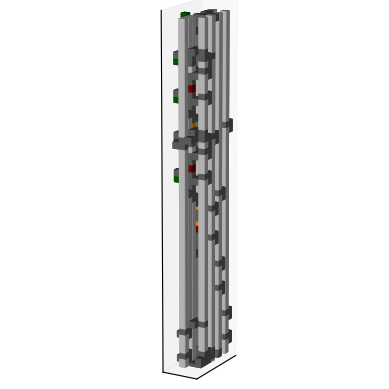

In [8]:
plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True, z_min=200, z_max=600)